In [ ]:
import numpy as np
import pandas as pd
from scipy.linalg import eigh, eig
from numpy.linalg import inv
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
N=400


# Generating data


In [ ]:
data = pd.DataFrame(np.random.normal(loc=3,size=N, scale=2),columns=["var1"])

In [ ]:
data["var2"] = data["var1"] + np.random.normal(0, 1, N)
data = data[["var1", "var2"]]
data

,var1,var2
0,1.851225,0.508614
1,3.686237,4.360240
2,0.570491,0.471810
3,3.917526,2.280945
4,4.174098,3.172170
...,...,...
395,5.253711,6.436793
396,-0.655619,-0.447060
397,3.430097,0.953135
398,-1.622313,-0.135733


In [ ]:
data.describe()

,var1,var2
count,400.000000,400.000000
mean,3.139301,3.174087
std,2.201689,2.370409
min,-2.529362,-2.735350
25%,1.566343,1.596064
50%,3.113002,3.064169
75%,4.716690,4.761894
max,10.445350,11.082322


# Standardising the data

In [ ]:
data -= data.mean()
data /= data.std()

# Plotting the data
TODO: fix plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[(-3.0, 3.0)]

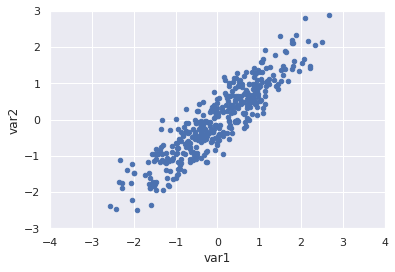

In [ ]:
fig, ax = plt.subplots()
data.plot.scatter(x="var1", y="var2", ax=ax)
ax.set(xlim=[-4,4])
ax.set(ylim=[-3,3])

# Obtain standardised Variance-Covariance Matrix

In [ ]:
# define X as kxN matrix
X=data.values[:,0:2].T

In [ ]:
varcov = np.matmul(X, X.T) / (N-1)
varcov

array([[1.        , 0.90723631],
       [0.90723631, 1.        ]])

In [ ]:
np.cov(X)

array([[1.        , 0.90723631],
       [0.90723631, 1.        ]])

# Find Principal Components i.e. Eigenvectors of Variance Covariance Matrix

In [ ]:
evals,evecs=eig(varcov)
indices = np.argsort(evals)[::-1] # Sorting by size of eigenvalue
evecs = evecs[:,indices]
evals = evals[indices]
print("Matrix with Eigenvectors as columns: ", evecs)
print("Eigenvalues: ", evals)

Matrix with Eigenvectors as columns:  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Eigenvalues:  [1.90723631+0.j 0.09276369+0.j]


In [ ]:
evecs[:,0]

array([0.70710678, 0.70710678])

In [ ]:
evecs[:,1]

array([-0.70710678,  0.70710678])

Verifying that eigenvectors are orthogonal

In [ ]:
np.dot(evecs[:,0], evecs[:,1])

2.2371143170757382e-17

Verifying that we can diagonalise the variance covariance matrix with its eigenvectors.

In [ ]:
diag_var_cov = np.matmul(np.matmul(inv(evecs),varcov), evecs)
diag_var_cov

array([[ 1.90723631e+00, -1.62602838e-16],
       [-2.09157727e-16,  9.27636930e-02]])

Verifying that our obtained eig vectors are the same as the output from sklearns pca object.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_check = pca.fit(X.T)
data_check.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

# Drawing data plus principal components

In [ ]:
data.iloc[0:2,:]

,var1,var2
0,-0.585040,-1.124478
1,0.248416,0.500400


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[(-3.0, 3.0)]

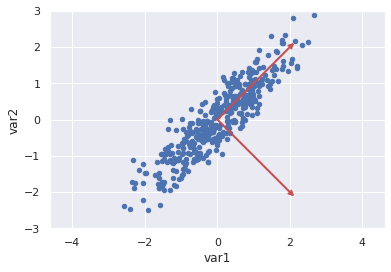

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="r")
    ax.annotate('', v1, v0, arrowprops=arrowprops)
fig, ax = plt.subplots()
# plot data
data.plot.scatter(x="var1", y="var2", ax=ax)
for vector in evecs:
    v = vector * 3
    draw_vector([0, 0], [0, 0] + v, ax=ax)
plt.axis('equal');
ax.set(xlim=[-4,4])
ax.set(ylim=[-3,3])


# Projecting the data onto the principal components

In [ ]:
def get_eig_projections(X: np.array, eig_vec: np.array) -> np.array:
  """
  X: kxN matrix of data
  eig_vec: kx1 eigen vector of variance covariance matrix associated with X
  """
  # scalar projection as 1xN matrix
  scalar_proj = np.dot(eig_vec.T, X)
  # vector projections as kxN matrix
  vector_projections = np.matmul(eig_vec[:,np.newaxis], scalar_proj[np.newaxis,:])
  return vector_projections


In [ ]:
def plot_eig_projections(X: np.array, eig_vec: np.array) -> None:
  vector_projections = get_eig_projections(X, eig_vec)
  df_plot = pd.DataFrame(data=X.T, columns=["var1", "var2"])
  fig, ax = plt.subplots()
  df_plot.plot.scatter(x="var1", y="var2", ax=ax, alpha=0.2)
  df_plot.iloc[0:3,:].plot.scatter(x="var1", y="var2", ax=ax, alpha=1, color="orange", s=120)
  pd.DataFrame(vector_projections.T, columns=["var1", "var2"]).plot.scatter(x="var1", y="var2", ax=ax, color="r", alpha=0.4)
  pd.DataFrame(vector_projections.T, columns=["var1", "var2"]).iloc[0:3,:].plot.scatter(x="var1", y="var2", ax=ax, color="orange", alpha=1, marker="x", s=120)
  ax.set(xlim=[-4,4])
  ax.set(ylim=[-3,3])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


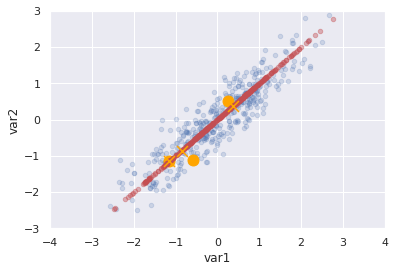

In [ ]:
plot_eig_projections(X,evecs[:,0])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


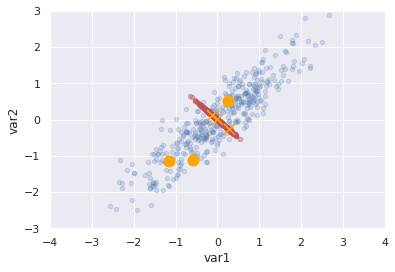

In [ ]:
plot_eig_projections(X,evecs[:,1])

In [ ]:
data_new = data.copy()
data_new[["pc1", "pc2"]]=pd.DataFrame(np.matmul(evecs[:,0:2].T, X).T, columns=["pc1", "pc2"])
data

,var1,var2
0,-0.585040,-1.124478
1,0.248416,0.500400
2,-1.166745,-1.140004
3,0.353467,-0.376788
4,0.470002,-0.000808
...,...,...
395,0.960358,1.376432
396,-1.723640,-1.527647
397,0.132079,-0.936949
398,-2.162709,-1.396308


# Checking covariance matrix of new data

In [ ]:
np.cov(data_new[["pc1", "pc2"]].T)

array([[ 1.90723631e+00, -1.36343178e-17],
       [-1.36343178e-17,  9.27636930e-02]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


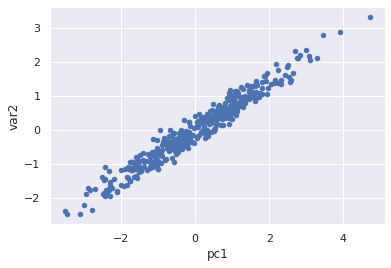

In [ ]:
data_new.plot.scatter(x="pc1", y="var2")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


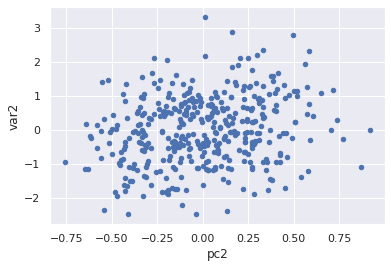

In [ ]:
data_new.plot.scatter(x="pc2", y="var2")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[(-3.0, 3.0)]

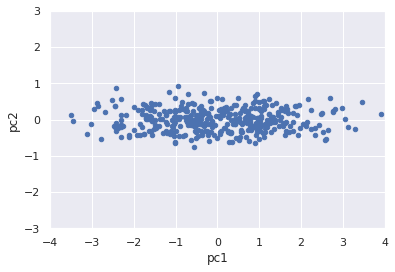

In [ ]:
fig, ax = plt.subplots()
data_new.plot.scatter(x="pc1", y="pc2", ax=ax)
ax.set(xlim=[-4,4])
ax.set(ylim=[-3,3])